## **3. Como o PCA Funciona (Melhorado e Prático)**

### **3.1 Etapas do PCA**

Vamos demonstrar cada etapa com códigos práticos usando Python. O exemplo usará o dataset clássico **Iris**, que é ideal para ilustrar o PCA.

### **Etapa 1: Normalização dos Dados**

Antes de aplicar o PCA, os dados precisam ser normalizados para evitar que variáveis com escalas maiores dominem a análise.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Carregar o dataset Iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Normalização dos dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Exibir os primeiros dados normalizados
print("Dados normalizados:")
print(pd.DataFrame(df_scaled, columns=data.feature_names).head())

Dados normalizados:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


### **Etapa 2: Construção da Matriz de Covariância**

A matriz de covariância é usada para identificar como as variáveis estão relacionadas.

In [2]:
# Matriz de covariância
cov_matrix = np.cov(df_scaled, rowvar=False)

print("Matriz de covariância:")
print(cov_matrix)

Matriz de covariância:
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


### **Etapa 3: Cálculo dos Autovalores e Autovetores**

Os autovalores indicam a variância explicada, enquanto os autovetores definem as direções principais (componentes principais).

In [3]:
# Cálculo dos autovalores e autovetores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Autovalores (variância explicada):")
print(eigenvalues)

print("Autovetores (direções dos componentes principais):")
print(eigenvectors)

Autovalores (variância explicada):
[2.93808505 0.9201649  0.14774182 0.02085386]
Autovetores (direções dos componentes principais):
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


### **Etapa 4: Seleção dos Componentes Principais**

Os componentes principais são escolhidos com base nos autovalores mais altos.

In [4]:
# Selecionar os dois primeiros componentes principais
n_components = 2
principal_components = eigenvectors[:, :n_components]

print(f"Primeiros {n_components} componentes principais:")
print(principal_components)

Primeiros 2 componentes principais:
[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


### **Etapa 5: Projeção dos Dados**

Os dados originais são projetados no novo espaço definido pelos componentes principais.

In [5]:
# Projeção dos dados
projected_data = np.dot(df_scaled, principal_components)

print("Dados projetados:")
print(pd.DataFrame(projected_data, columns=[f"PC{i+1}" for i in range(n_components)]).head())

Dados projetados:
        PC1       PC2
0 -2.264703 -0.480027
1 -2.080961  0.674134
2 -2.364229  0.341908
3 -2.299384  0.597395
4 -2.389842 -0.646835


### **3.2 Intuição Visual**

Vamos criar gráficos para entender visualmente o PCA.

### **Visualização dos Dados Originais**

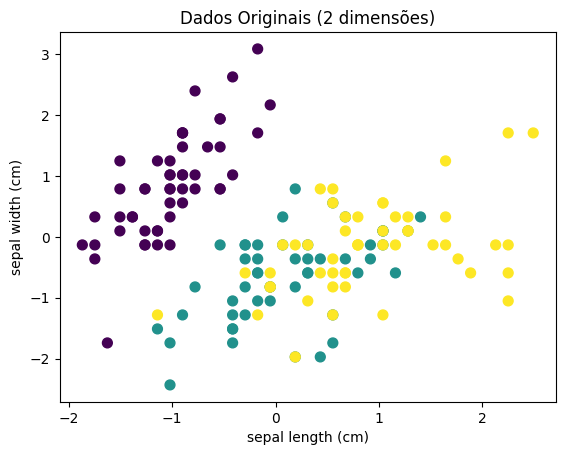

In [6]:
import matplotlib.pyplot as plt

# Visualização dos dois primeiros atributos do dataset original
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=data.target, cmap='viridis', s=50)
plt.title("Dados Originais (2 dimensões)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

### **Visualização dos Componentes Principais**

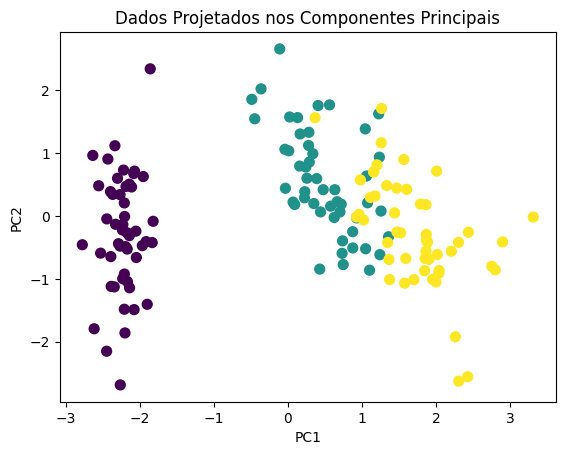

In [7]:
# Visualizar os dados projetados no espaço dos componentes principais
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=data.target, cmap='viridis', s=50)
plt.title("Dados Projetados nos Componentes Principais")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### **3.3 Variância Explicada**

A variância explicada ajuda a decidir quantos componentes principais usar.

Variância explicada por componente principal:
[0.72962445 0.22850762 0.03668922 0.00517871]


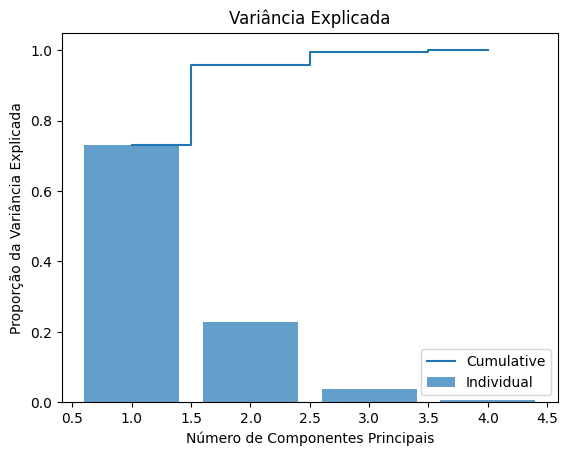

In [8]:
# Variância explicada por cada componente
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Variância explicada cumulativa
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Variância explicada por componente principal:")
print(explained_variance_ratio)

# Gráfico de variância explicada
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative')
plt.title("Variância Explicada")
plt.xlabel("Número de Componentes Principais")
plt.ylabel("Proporção da Variância Explicada")
plt.legend(loc='best')
plt.show()

### **3.4 Scree Plot Automático com scikit-learn**

A biblioteca scikit-learn simplifica o cálculo e a visualização.

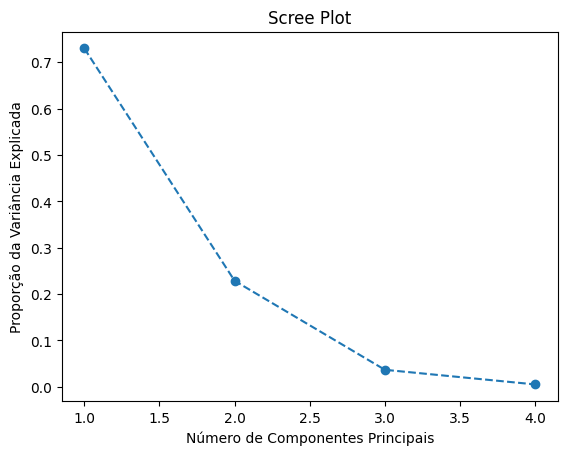

In [9]:
from sklearn.decomposition import PCA

# Aplicar PCA com scikit-learn
pca = PCA()
pca.fit(df_scaled)

# Scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Proporção da Variância Explicada')
plt.show()

### **3.5 Comparação com Dados Originais**

Uma análise prática para comparar os resultados após a aplicação do PCA.

In [10]:
# Reconstruir os dados a partir dos componentes principais
reconstructed_data = np.dot(projected_data, principal_components.T)

print("Dados reconstruídos (após PCA):")
print(pd.DataFrame(reconstructed_data, columns=data.feature_names).head())

Dados reconstruídos (após PCA):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.998889          1.053198          -1.302707         -1.247098
1          -1.338748         -0.061923          -1.224328         -1.220572
2          -1.360961          0.321117          -1.380603         -1.358338
3          -1.423598          0.067762          -1.349224         -1.338813
4          -1.001138          1.240918          -1.371254         -1.306618


### **3.6 PCA com Kernel (Kernel PCA)**

Para capturar relações não lineares, o Kernel PCA é uma alternativa poderosa.

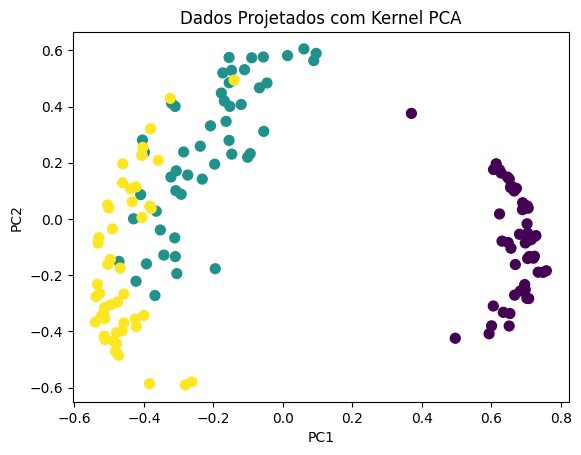

In [11]:
from sklearn.decomposition import KernelPCA

# Aplicar Kernel PCA
kpca = KernelPCA(kernel='rbf', gamma=0.1, n_components=2)
kernel_projected_data = kpca.fit_transform(df_scaled)

# Visualizar os dados após Kernel PCA
plt.scatter(kernel_projected_data[:, 0], kernel_projected_data[:, 1], c=data.target, cmap='viridis', s=50)
plt.title("Dados Projetados com Kernel PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## Gráficos para medir a construção do PCA

### **3.7 Gráficos Adicionais para Métricas e Análises**

### **1. Mapa de Calor da Matriz de Covariância**

Um **heatmap** visualiza as correlações entre as variáveis após a normalização.

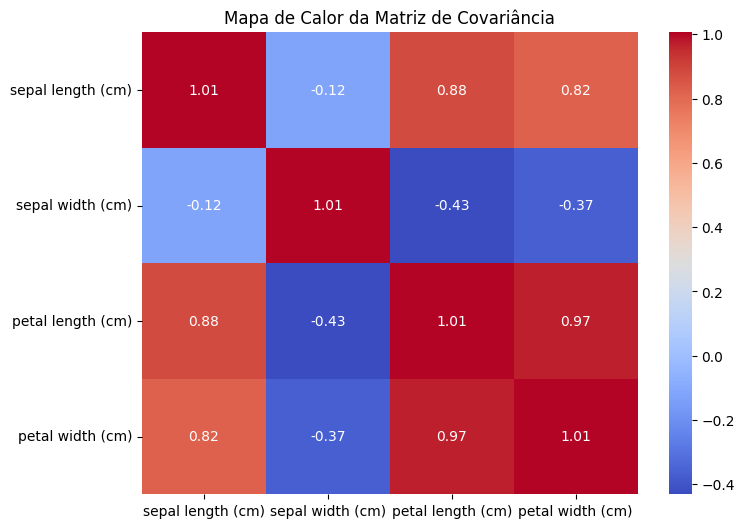

In [12]:
import seaborn as sns

# Mapa de calor da matriz de covariância
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=data.feature_names, yticklabels=data.feature_names)
plt.title("Mapa de Calor da Matriz de Covariância")
plt.show()

### **2. Gráfico de Variância Acumulada**

Visualizar a variância cumulativa explica quantos componentes principais são necessários.

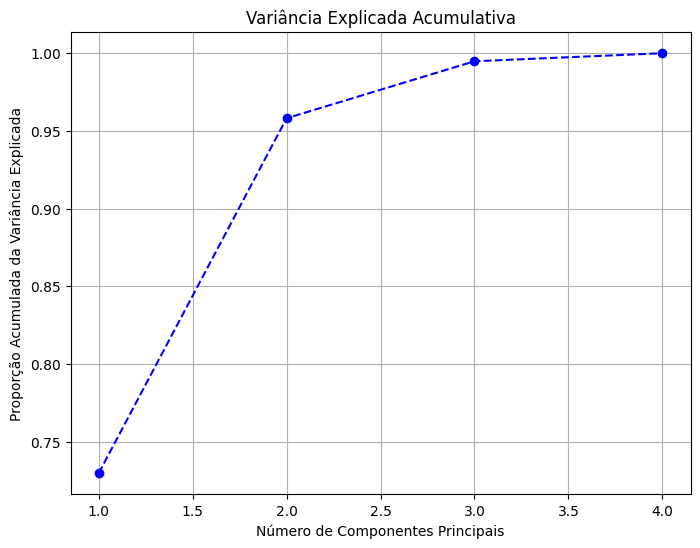

In [13]:
# Gráfico de variância cumulativa
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Variância Explicada Acumulativa')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Proporção Acumulada da Variância Explicada')
plt.grid()
plt.show()

### **3. Análise de Outliers com PCA**

Depois do PCA, podemos identificar possíveis outliers no espaço dos componentes principais.

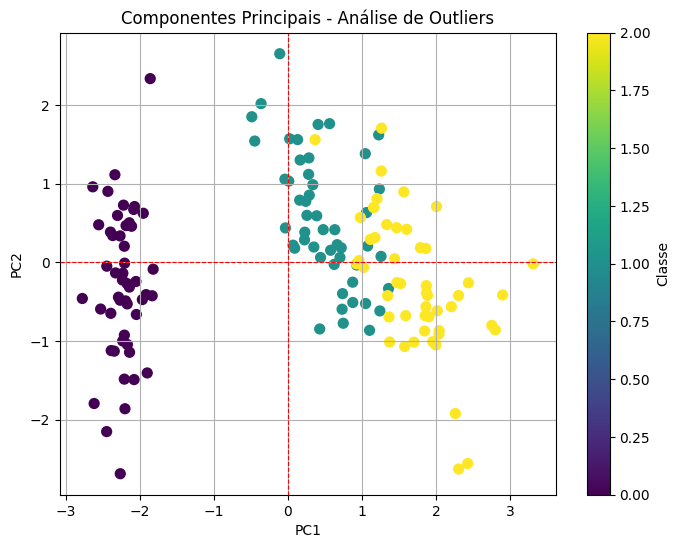

In [14]:
# Visualizar possíveis outliers
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=data.target, cmap='viridis', s=50)
plt.title("Componentes Principais - Análise de Outliers")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Classe')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.axvline(0, color='red', linestyle='--', linewidth=0.8)
plt.grid()
plt.show()

### **4. Biplot: Projeção e Componentes Originais**

O **biplot** mostra a projeção dos dados e a contribuição das variáveis originais para os componentes principais.

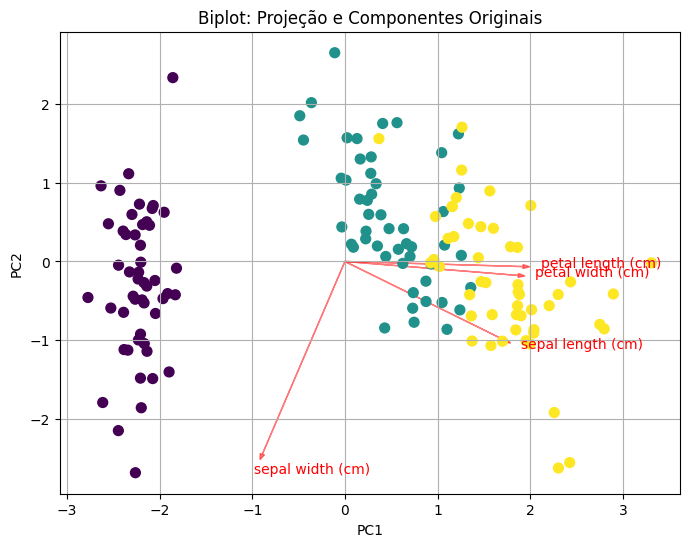

In [15]:
# Criar o Biplot
plt.figure(figsize=(8, 6))
for i in range(len(data.feature_names)):
    plt.arrow(0, 0, eigenvectors[i, 0] * max(projected_data[:, 0]),
              eigenvectors[i, 1] * max(projected_data[:, 1]),
              color='r', alpha=0.5, head_width=0.05)
    plt.text(eigenvectors[i, 0] * max(projected_data[:, 0]) * 1.1,
             eigenvectors[i, 1] * max(projected_data[:, 1]) * 1.1,
             data.feature_names[i], color='r')

plt.scatter(projected_data[:, 0], projected_data[:, 1], c=data.target, cmap='viridis', s=50)
plt.title("Biplot: Projeção e Componentes Originais")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

### **5. Gráfico 3D dos Componentes**

Para datasets com mais de dois componentes principais, uma visualização 3D ajuda a explorar as relações entre as variáveis.

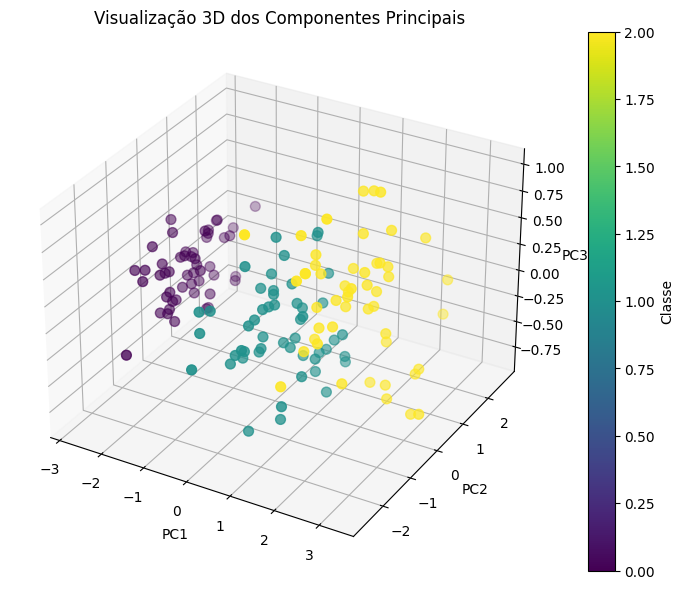

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# PCA com 3 componentes
pca_3d = PCA(n_components=3)
projected_data_3d = pca_3d.fit_transform(df_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(projected_data_3d[:, 0], projected_data_3d[:, 1], projected_data_3d[:, 2], c=data.target, cmap='viridis', s=50)
plt.title("Visualização 3D dos Componentes Principais")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.colorbar(sc, label='Classe')
plt.show()

### **6. Reconstrução dos Dados e Erro de Reconstrução**

O erro de reconstrução avalia a perda de informação ao usar menos componentes.

Erro médio de reconstrução (2 componentes): 0.0419


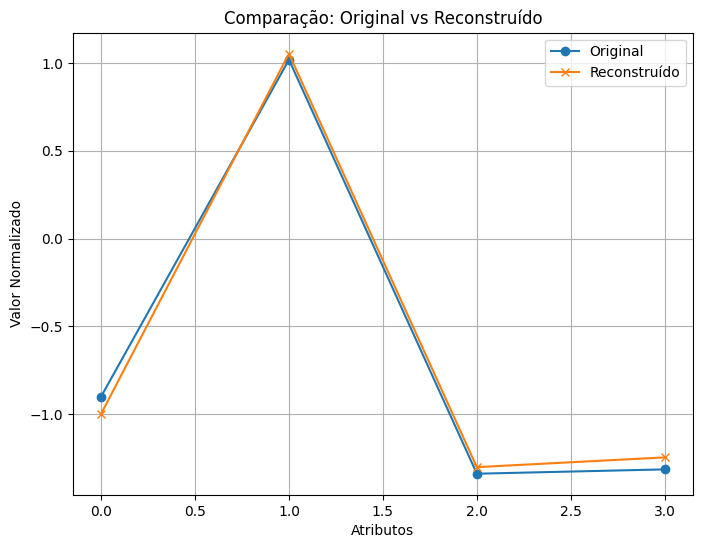

In [17]:
# Reconstrução dos dados com os dois primeiros componentes
reconstructed_data_2d = np.dot(projected_data, principal_components.T)

# Calcular o erro de reconstrução
reconstruction_error = np.mean((df_scaled - reconstructed_data_2d)**2)

print(f"Erro médio de reconstrução (2 componentes): {reconstruction_error:.4f}")

# Visualizar os dados reconstruídos versus originais
plt.figure(figsize=(8, 6))
plt.plot(df_scaled[0], label="Original", marker='o')
plt.plot(reconstructed_data_2d[0], label="Reconstruído", marker='x')
plt.title("Comparação: Original vs Reconstruído")
plt.xlabel("Atributos")
plt.ylabel("Valor Normalizado")
plt.legend()
plt.grid()
plt.show()

### **7. Clusterização nos Componentes Principais**

Podemos aplicar clusterização nos dados projetados para avaliar padrões.

c:\Users\schit\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\schit\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 245, in _count_physical_cores
    raise ValueError(


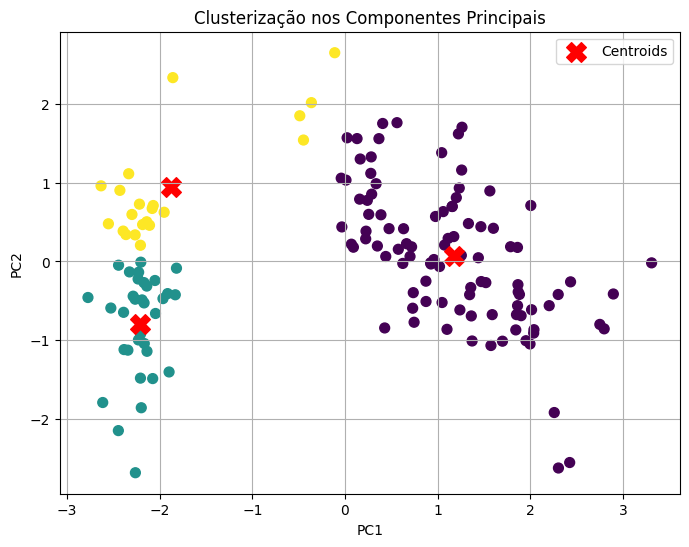

In [18]:
from sklearn.cluster import KMeans

# Aplicar KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(projected_data)

# Visualizar os clusters nos componentes principais
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("Clusterização nos Componentes Principais")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid()
plt.show()

### **Resumo**

Agora, o tópico 3 oferece mais métricas e gráficos:

1. **Mapa de Calor**: Para entender correlações.
2. **Gráfico de Variância Acumulada**: Auxilia na escolha de componentes.
3. **Análise de Outliers**: Identifica dados atípicos.
4. **Biplot**: Conecta variáveis originais e componentes principais.
5. **Visualização 3D**: Explora mais componentes.
6. **Erro de Reconstrução**: Avalia a perda de informação.
7. **Clusterização nos Componentes**: Aplica agrupamento para análise.